In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle

#importing some regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#importing some  classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error
import math

acc_arr=[]

In [30]:
df = pd.read_csv(r"C:\Users\saich\Downloads\Walmart.csv")

In [15]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [32]:
from sklearn.model_selection import train_test_split
df.pop('Store')
df.pop('Date')
y = df.pop('Weekly_Sales')
X = df

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
var=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
df[var]=scaler.fit_transform(df[var])


Training Regression Models

In [34]:
#Using train test split for all regression models.



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [35]:
X_train

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6215,0,0.532877,0.650301,0.029901,0.290109
1169,0,0.801272,0.084168,0.878351,0.245639
4917,0,0.343542,0.401804,0.111818,0.447575
4309,0,0.863405,0.082665,0.840631,0.414127
1041,0,0.557241,0.128257,0.882763,0.244777
...,...,...,...,...,...
1461,1,0.821820,0.046593,0.877173,0.332279
3917,0,0.526223,0.602204,0.021753,0.972015
1738,0,0.718102,0.165331,0.000868,0.390263
2379,0,0.387280,0.534068,0.036980,0.262411


In [21]:
y_train

6258     303438.24
3582     893613.00
5793    1333347.78
1373    1627707.31
5923     508432.17
           ...    
1582    1041238.87
1964    2077256.24
2947     663452.46
2898     731756.65
3204    1203682.62
Name: Weekly_Sales, Length: 5148, dtype: float64

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

RFregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFregressor.fit(X_train,y_train)

DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
print(y_train)

[[225.4782634]
 [136.7862258]
 [192.4225954]
 ...
 [135.4468   ]
 [129.3259355]
 [204.7513279]]


In [24]:
model.score(X_test,y_test)

0.03131260063550734

In [36]:
import statsmodels.api as sm
x1=sm.add_constant(X_train)
lr=sm.OLS(y_train,x1.astype(float)).fit()
lr.summary()

C:\Users\saich\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     24.96
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           6.83e-25
Time:                        19:52:16   Log-Likelihood:                 2069.7
No. Observations:                4504   AIC:                            -4127.
Df Residuals:                    4498   BIC:                            -4089.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3209      0.011     29.867      0.000       0.300       0.342
Holiday_Flag     0.0133      0.009      1.429      0.153      -0.005       0.032
Temperature     -0.0257      0.014     -1.887      0.059      -0.052       0.001
Fuel_Price      -0.0117      0.010     -1.137      0.256      -0.032       0.008
CPI             -0.0441      0.007     -6.789      0.000      -0.057      -0.031
Unemployment    -0.1239      0.013     -9.238      0.000      -0.150      -0.098
==============================================================================
Omnibus:                      245.115   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.029
Skew:                           0.616   Prob(JB):                     7.76e-63
Kurtosis:                       2.915   Cond. No.                         9.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#Now predict weight and get a value for accuracy of our model.
LRscore = model.score(X_test,y_test)
acc_arr.append(LRscore)
print("Linear regression accuracy: ", LRscore)

RFRscore = RFregressor.score(X_test,y_test)
acc_arr.append(RFRscore)
print("Random forest accuracy: ", RFRscore)

DTscore = DTregressor.score(X_test,y_test)
acc_arr.append(DTscore)
print("Decision Tree accuracy: ", DTscore)

Linear regression accuracy:  0.0034149130716175646
Random forest accuracy:  -0.21368981152653999
Decision Tree accuracy:  -0.6225677361900994


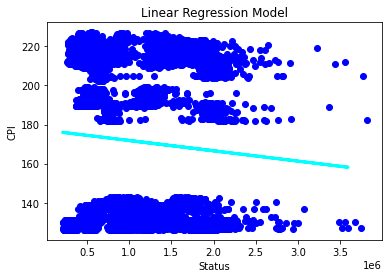

In [8]:
#Plot a scatter line graph to understand regression.

y_predlr=model.predict(X_test)
plt.scatter(X,y,color='b')
plt.plot(X_test,y_predlr,color='cyan',linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Status')
plt.ylabel('CPI')
plt.show()

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, RFregressor.predict(X_grid), color = 'yellow')
plt.title('Random Forest Regression Model')
plt.xlabel('Status')
plt.ylabel('CPI')
plt.show()

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, DTregressor.predict(X_grid), color = 'yellow')
plt.title('Decision Tree Regression Model')
plt.xlabel('Status')
plt.ylabel('CPI')
plt.show()

Comparing The Three Models


<BarContainer object of 3 artists>

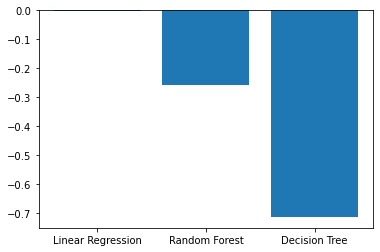

In [ ]:
models=["Linear Regression","Random Forest", "Decision Tree"]
plt.bar(models,acc_arr)

In [ ]:
filename = 'linear_regression.pkl'
pickle.dump(model, open(filename, 'wb'))

filename = 'randomforest.pkl'
pickle.dump(RFregressor, open(filename, 'wb'))

filename = 'decisiontree.pkl'
pickle.dump(DTregressor, open(filename, 'wb'))

In [37]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))